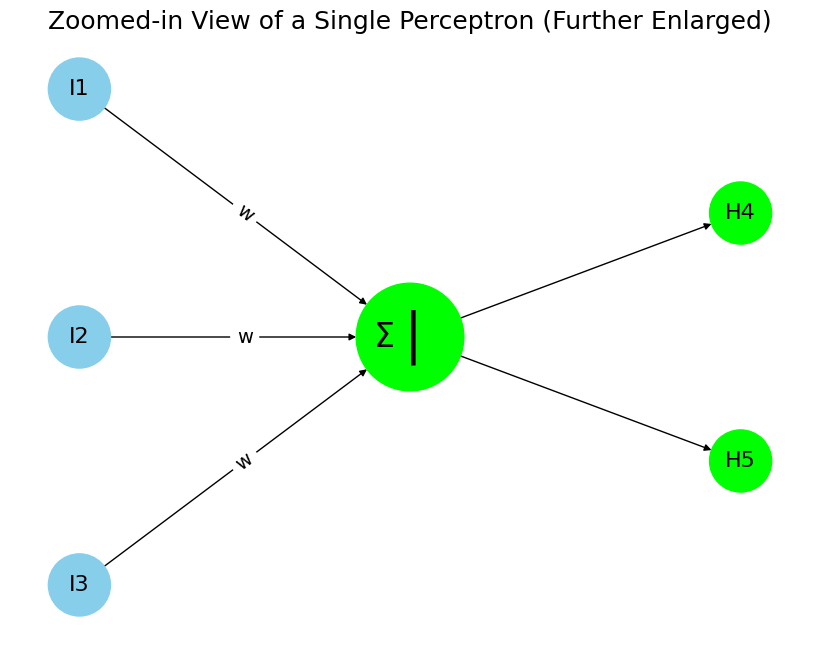

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx   


# Create a new directed subgraph to "zoom in" on the highlighted perceptron H2
G_sub = nx.DiGraph()

# Define nodes for input connections to H2
input_to_H2 = ['I1', 'I2', 'I3']
G_sub.add_nodes_from(input_to_H2, layer='input_to_H2')

# Define the node for H2
G_sub.add_node('H2', layer='H2')

# Define nodes for output connections from H2
output_from_H2 = ['H4', 'H5']
G_sub.add_nodes_from(output_from_H2, layer='output_from_H2')

# Define edges from input connections to H2
for i in input_to_H2:
    G_sub.add_edge(i, 'H2', label='w')

# Define edges from H2 to output connections
for i in output_from_H2:
    G_sub.add_edge('H2', i)

# Position nodes
pos_sub = {'I1': (-1, 1), 'I2': (-1, 0), 'I3': (-1, -1),
           'H2': (0, 0),
           'H4': (1, 0.5), 'H5': (1, -0.5)}


# Draw edge labels to indicate weights
edge_labels = {(i, 'H2'): 'w' for i in input_to_H2}

# Draw the subgraph with an even larger H2 node and without the "H2" label
plt.figure(figsize=(8, 6))
nx.draw(G_sub, pos_sub, with_labels=False, node_color=['skyblue']*3 + ['lime'] + ['lime']*2,
        node_size=[2000]*3 + [6000] + [2000]*2, font_size=16, font_color='black', font_weight='bold', arrows=True)

# Add labels manually to avoid labeling H2
for node, (x, y) in pos_sub.items():
    if node != 'H2':
        plt.text(x, y, node, fontsize=16, ha='center', va='center')

# Draw edge labels to indicate weights
nx.draw_networkx_edge_labels(G_sub, pos_sub, edge_labels=edge_labels, font_size=14)

# Annotate the sum and activation function inside the H2 node with more space and updated text
plt.text(-0.05, 0, '$\Sigma$', fontsize=24, ha='right', va='center')
plt.text(0, 0, r'$|$', fontsize=40, ha='center', va='center')
#plt.text(0, -0.35, r'$f(x)$', fontsize=24, ha='center', va='center')  # Adding f(x) to symbolize activation function

plt.title('Zoomed-in View of a Single Perceptron (Further Enlarged)', fontsize=18)
plt.axis('off')
#plt.show()

# Save graph as svg file
plt.savefig('perceptron.svg', format='svg', bbox_inches='tight')
